In [90]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [91]:
X,Y = make_circles(n_samples=500,noise=0.02)

In [92]:
print(X.shape,Y.shape)

(500, 2) (500,)


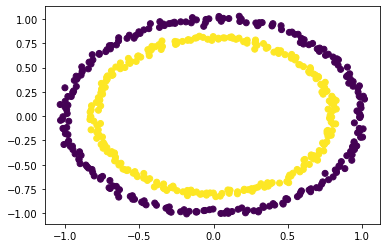

In [93]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [94]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [95]:
X_ = phi(X)

(500, 3)


In [96]:
X_.shape

(500, 3)

In [97]:
print(X_[:3,:])

[[ 0.01443242 -0.82918703  0.68775943]
 [ 0.8093585   0.11401859  0.66806142]
 [ 0.67328245 -0.44098332  0.64777555]]


In [98]:
# fig = plt.figure(figsize=(10,10))
# fig.add_subplot?

In [99]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax
    

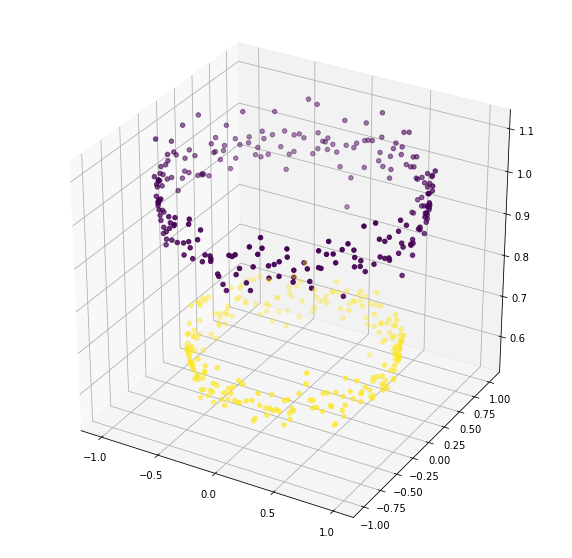

In [100]:
ax = plot3d(X_)

### Logistic Classifier

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [102]:
lr = LogisticRegression()

In [103]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 43.6000


### Logistic Classifier on Higher Dimension Space

In [104]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


### Visualise the Decision Surface

In [105]:
lr.fit(X_,Y)

LogisticRegression()

In [106]:
wts = lr.coef_
print(wts)

[[ -0.0256748    0.02255979 -10.90861933]]


In [107]:
bias = lr.intercept_

In [108]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [109]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)


[[0.8201355  0.81778187 0.81542825 0.81307462]
 [0.82220357 0.81984994 0.81749632 0.81514269]
 [0.82427164 0.82191801 0.81956439 0.81721076]
 [0.82633971 0.82398608 0.82163246 0.81927883]]


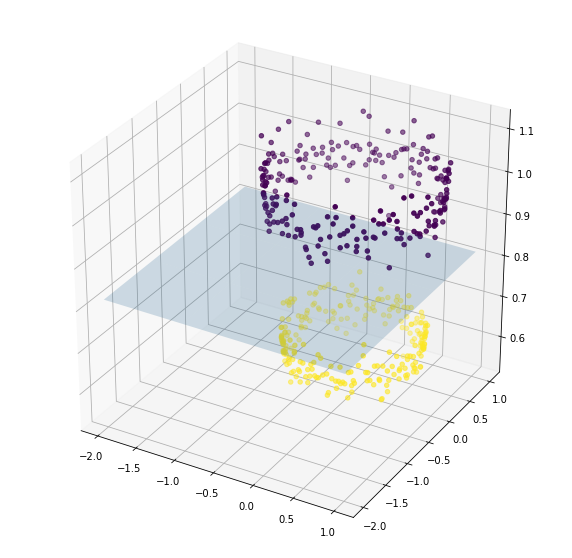

In [110]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

## Kernel Based Classifcation in SVM's
Sklearn supports the following types of Kernels, which can be used in many-real life problems.

- Linear Kernel
- RBF Kernel
- Polynomial Kernel
- Sigmoid Kernel

**Kernel trick** is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

https://towardsdatascience.com/kernel-function-6f1d2be6091

In [111]:
from sklearn import svm

### Linear Kernel SVM

In [112]:
svc = svm.SVC(kernel="linear")

In [113]:
svc.fit(X,Y)

SVC(kernel='linear')

In [114]:
svc.score(X,Y)

0.508

### RBF Kernel SVM

In [115]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

## Polynomial 

In [116]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

0.572

### Custom Kernel

In [117]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [118]:
svm.SVC?

Init signature:
svm.SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`sklearn.svm.LinearSVC` or
:class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrat

## Mathematical Formulation
https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation

https://scikit-learn.org/stable/modules/svm.html


In [89]:
def phi2(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = np.square(np.dot(X1,X2.T))
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [86]:
X_ = phi2(X)

(500, 3)


In [87]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax
    

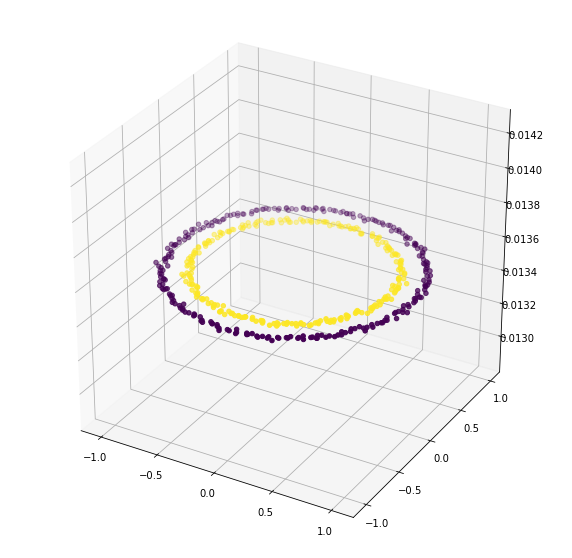

In [88]:
plot3d(X_)